In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# **Import Data**

In [4]:
udemy_data=pd.read_csv("/kaggle/input/udemy-courses-dataset/UdemyCoursesDataset.csv")
udemy_data.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments


In [5]:
udemy_data.tail(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


In [7]:
udemy_data.sample(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3440,629060,Trading Trends in ANY Market,True,30,632,49,22,All Levels,2 hours,2015-10-04T18:43:16Z,Business Finance
482,288854,"Beginner's Guitar: Tuning, Strumming, and Chords!",False,Free,2577,30,6,Beginner Level,37 mins,2015-07-03T19:07:11Z,Musical Instruments
1935,73068,Introduction to the CFA Program,False,Free,4248,66,6,Beginner Level,1 hour,2013-08-12T11:10:42Z,Business Finance


In [8]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [9]:
udemy_data.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [10]:
udemy_data.describe(include='object')

,course_title,price,level,content_duration,published_timestamp,subject
count,3682,3682,3682,3682,3682,3682
unique,3667,38,4,109,3676,4
top,Acoustic Blues Guitar Lessons,20,All Levels,1 hour,2014-04-15T21:48:55Z,Web Development
freq,3,830,1932,607,2,1200


In [11]:
udemy_data.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

# **Find out what courses are available**

In [22]:
udemy_data.subject.unique().sum()

'Musical InstrumentsBusiness FinanceGraphic DesignWeb Development'

In [41]:
udemy_data.subject.value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

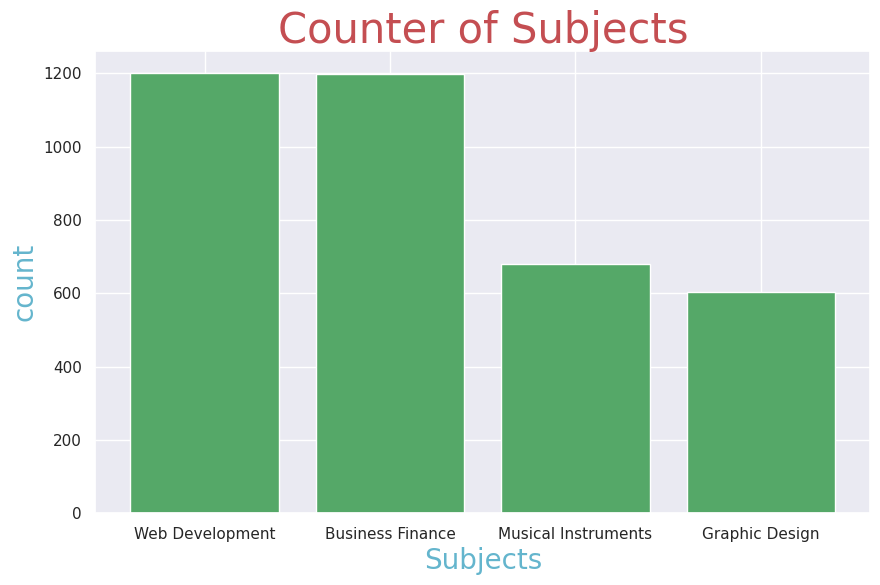

In [68]:
d_sub=udemy_data.subject.value_counts()
plt.figure(figsize=(10,6))
plt.bar(d_sub.index,d_sub.values,color='g')
plt.title("Counter of Subjects",color='r',fontsize=30)
plt.xlabel("Subjects",color='c',fontsize=20)
plt.ylabel("count",color='c',fontsize=20)
plt.show()

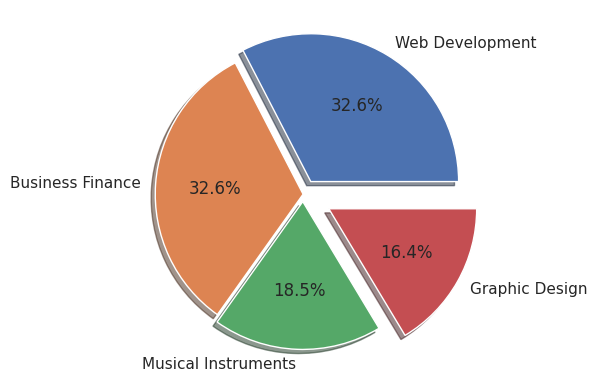

In [55]:
plt.pie(d_sub.values,labels=d_sub.index,explode=[.1,0,.05,.2], shadow=True,autopct='%1.1f%%')
plt.show()

# **Knowledge of paid and free courses**

In [71]:
udemy_data[udemy_data.is_paid ==False].head(4)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development


In [72]:
udemy_data[udemy_data.is_paid ==True].head(4)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments


In [102]:
udemy_data.groupby('is_paid')[['num_subscribers','subject']].max()

,num_subscribers,subject
is_paid,,
False,268923,Web Development
True,121584,Web Development


In [103]:
udemy_data.groupby('is_paid')[['num_subscribers','subject']].min()

,num_subscribers,subject
is_paid,,
False,1,Business Finance
True,0,Business Finance


<Axes: xlabel='subject', ylabel='count'>

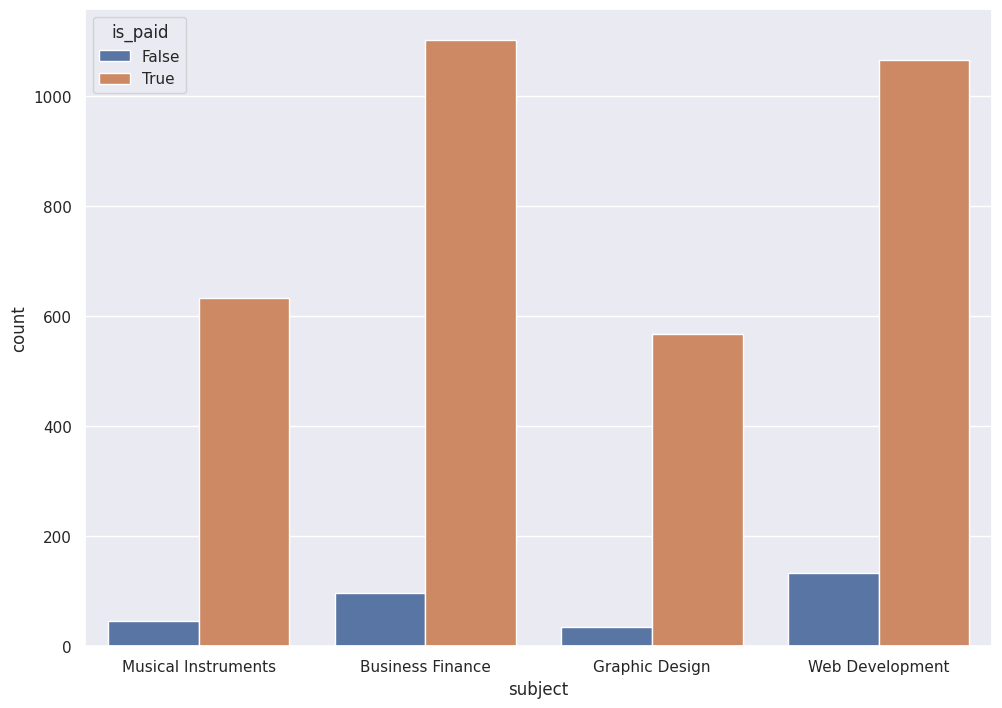

In [107]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='subject',data=udemy_data,hue='is_paid')

<Axes: xlabel='subject', ylabel='num_subscribers'>

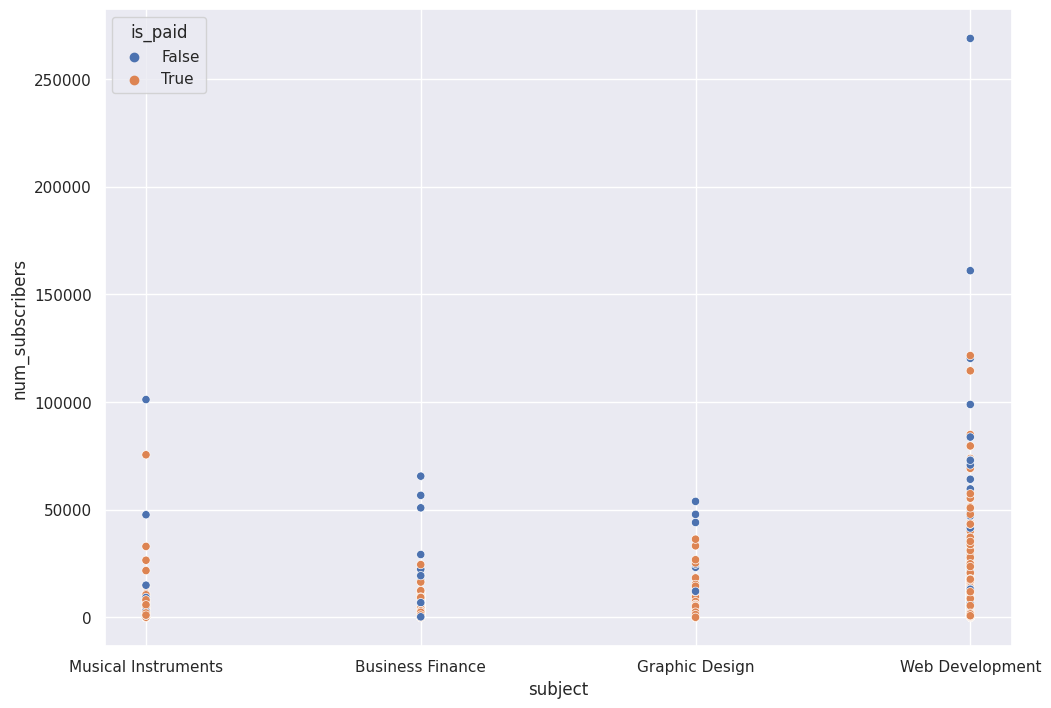

In [111]:
sns.scatterplot(data=udemy_data,x='subject',y='num_subscribers',hue='is_paid')

# **Number of hours and lectures for each course**

In [114]:
udemy_data[udemy_data.content_duration==udemy_data.content_duration.max()].head(4)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
24,975916,17 Complete JavaScript projects explained st...,True,95,327,26,106,Beginner Level,9.5 hours,2016-10-26T14:03:38Z,Web Development
75,766320,สร้างงานกราฟฟิคแอพพลิเคชั่นมือถือด้วย Adobe Il...,True,95,25,5,30,Beginner Level,9.5 hours,2016-02-25T17:18:41Z,Graphic Design
154,1022032,Adobe Illustrator CC,True,95,43,12,46,Intermediate Level,9.5 hours,2016-12-26T18:58:09Z,Graphic Design
187,632702,Adobe Suite : Unleash your creativity & benefi...,True,95,1005,4,46,All Levels,9.5 hours,2015-11-09T23:01:14Z,Graphic Design


In [116]:
udemy_data[udemy_data.content_duration==udemy_data.content_duration.min()].head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2635,627332,Mutual Funds for Investors in Retirement Accounts,True,95,0,0,0,All Levels,0,2015-12-17T05:38:38Z,Business Finance


In [118]:
udemy_data[udemy_data.num_lectures==udemy_data.num_lectures.max()].head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
394,79154,Back to School Web Development and Programming...,True,95,18170,117,779,Beginner Level,44.5 hours,2013-08-19T14:53:00Z,Web Development


In [119]:
udemy_data[udemy_data.num_lectures==udemy_data.num_lectures.min()].head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2635,627332,Mutual Funds for Investors in Retirement Accounts,True,95,0,0,0,All Levels,0,2015-12-17T05:38:38Z,Business Finance
3227,1271684,Test your Knowledge in Banking Credit Analysis...,True,95,17,0,0,All Levels,24 questions,2017-06-30T10:45:11Z,Business Finance
3228,1259560,Test your knowledge in Basics of Accounting,True,95,1000,11,0,Beginner Level,218 questions,2017-06-20T05:56:52Z,Business Finance
3229,1270254,Test your Knowledge in Cost Accounting,True,95,999,3,0,All Levels,18 questions,2017-06-27T10:43:44Z,Business Finance
3230,1259396,Test your knowledge in Financial Management,True,95,20,0,0,All Levels,82 questions,2017-06-21T05:05:10Z,Business Finance


In [124]:
d_num=udemy_data.groupby('subject')[["content_duration","num_lectures"]].max()
d_num

,content_duration,num_lectures
subject,,
Business Finance,9.5 hours,544
Graphic Design,9.5 hours,225
Musical Instruments,9.5 hours,362
Web Development,9.5 hours,779


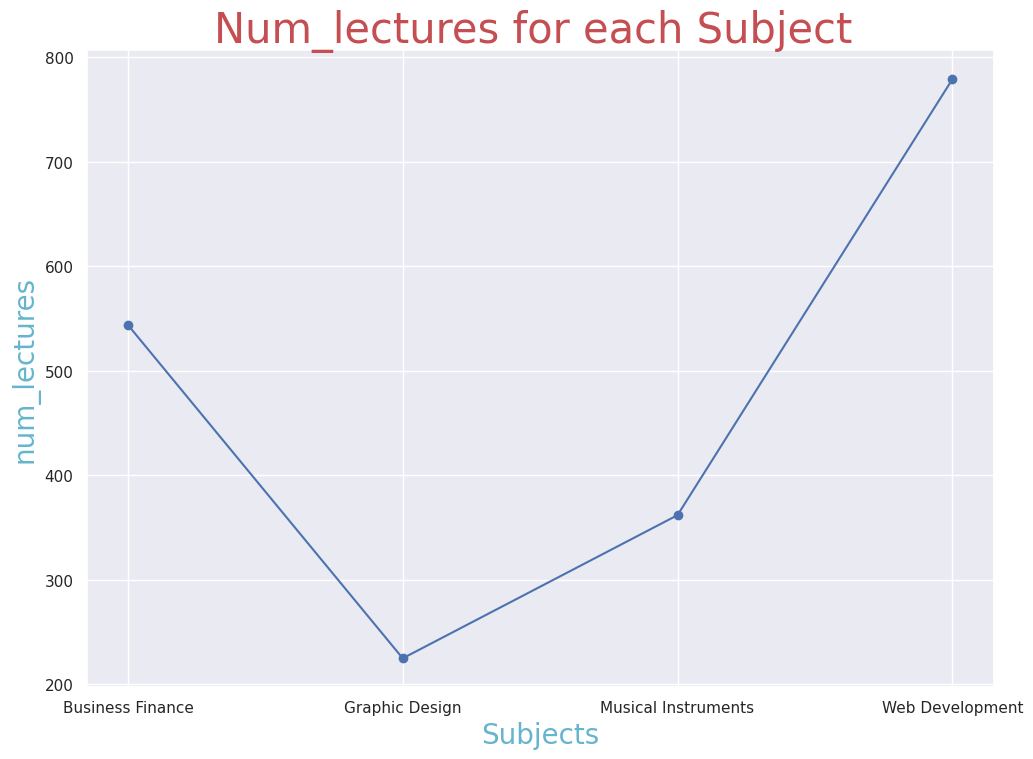

In [128]:
plt.plot(d_num.index,d_num['num_lectures'],marker='o')
plt.title("Num_lectures for each Subject ",color='r',fontsize=30)
plt.xlabel("Subjects",color='c',fontsize=20)
plt.ylabel("num_lectures",color='c',fontsize=20)
plt.show()

<Axes: xlabel='subject', ylabel='num_lectures'>

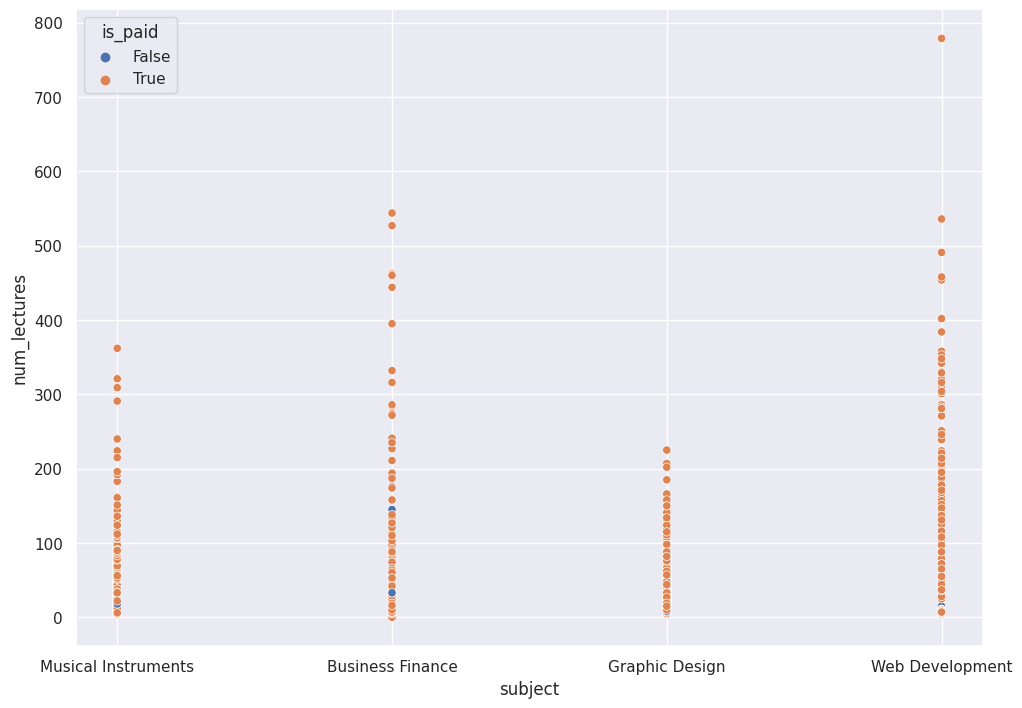

In [129]:
sns.scatterplot(data=udemy_data,x='subject',y='num_lectures',hue='is_paid')

# **Course levels**

In [137]:
d_lev=udemy_data.level.value_counts()
d_lev

level
All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

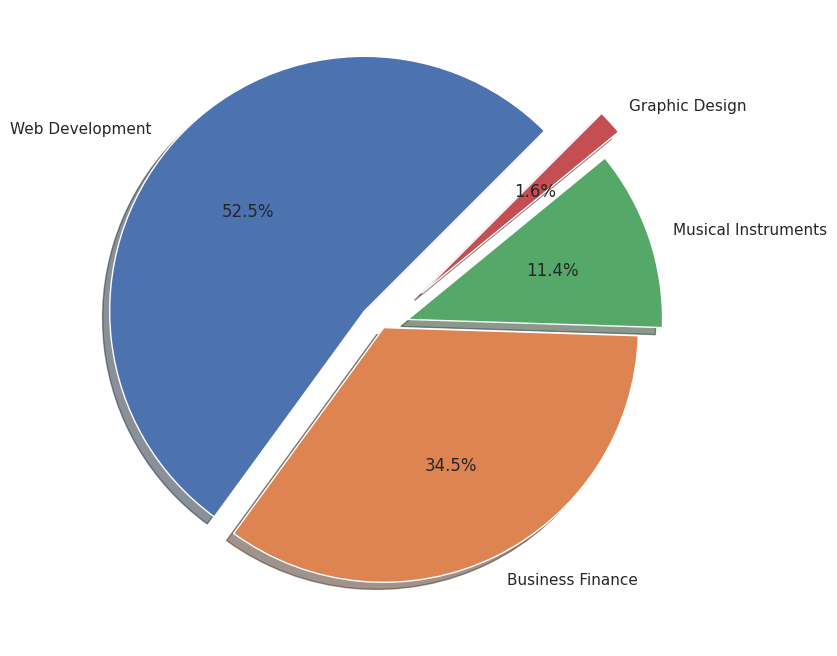

In [142]:
plt.pie(d_lev.values,labels=d_sub.index,explode=[.1,0,.1,.2], shadow=True,autopct='%1.1f%%',startangle=45)
plt.show()

<Axes: xlabel='level', ylabel='count'>

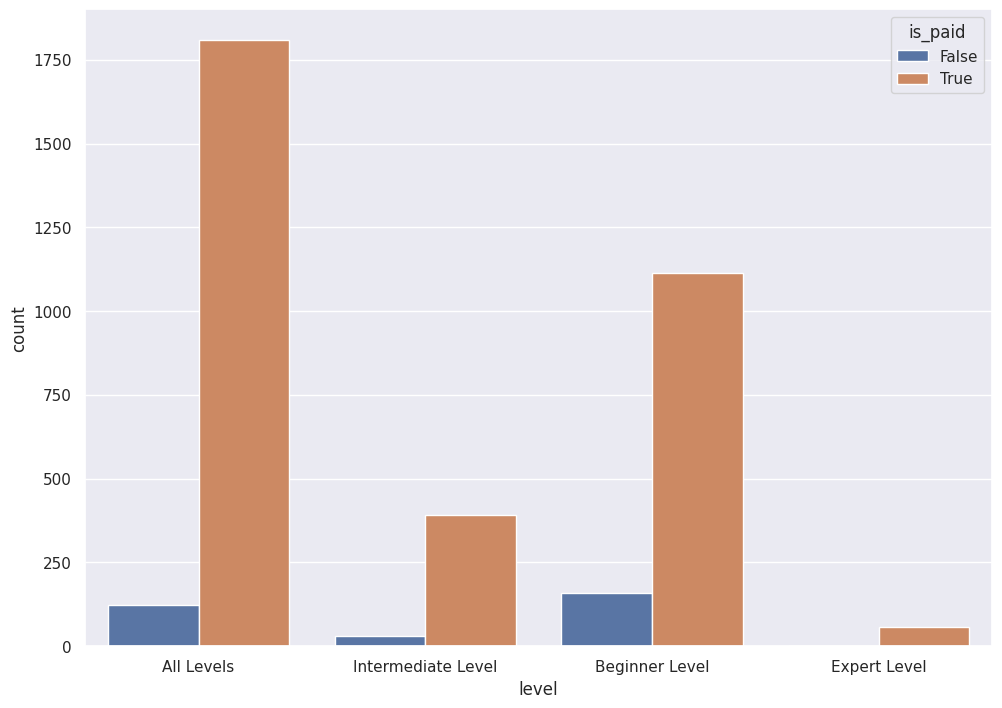

In [143]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='level',data=udemy_data,hue='is_paid')

<Axes: xlabel='level', ylabel='count'>

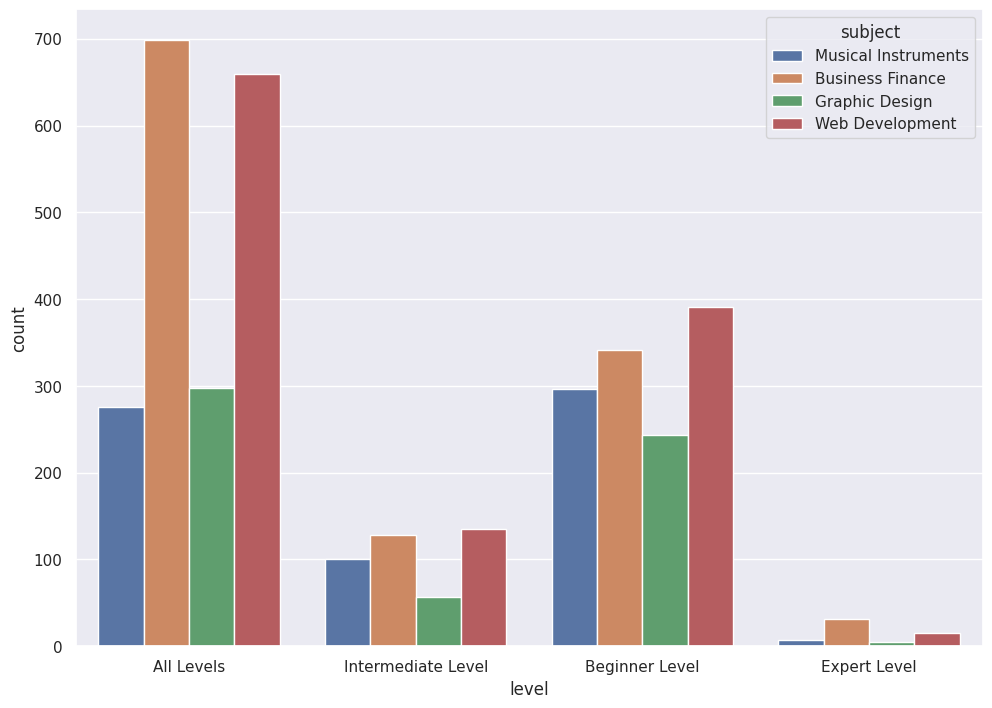

In [144]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='level',data=udemy_data,hue='subject')

In [186]:
d_num=udemy_data.groupby('level')[["subject","content_duration","num_lectures",'num_subscribers','num_reviews']].max()
d_num

,subject,content_duration,num_lectures,num_subscribers,num_reviews
level,,,,,
All Levels,Web Development,9.5 hours,544,268923,27445
Beginner Level,Web Development,9.5 hours,779,161029,5924
Expert Level,Web Development,9 hours,157,5172,249
Intermediate Level,Web Development,9.5 hours,320,29167,3326


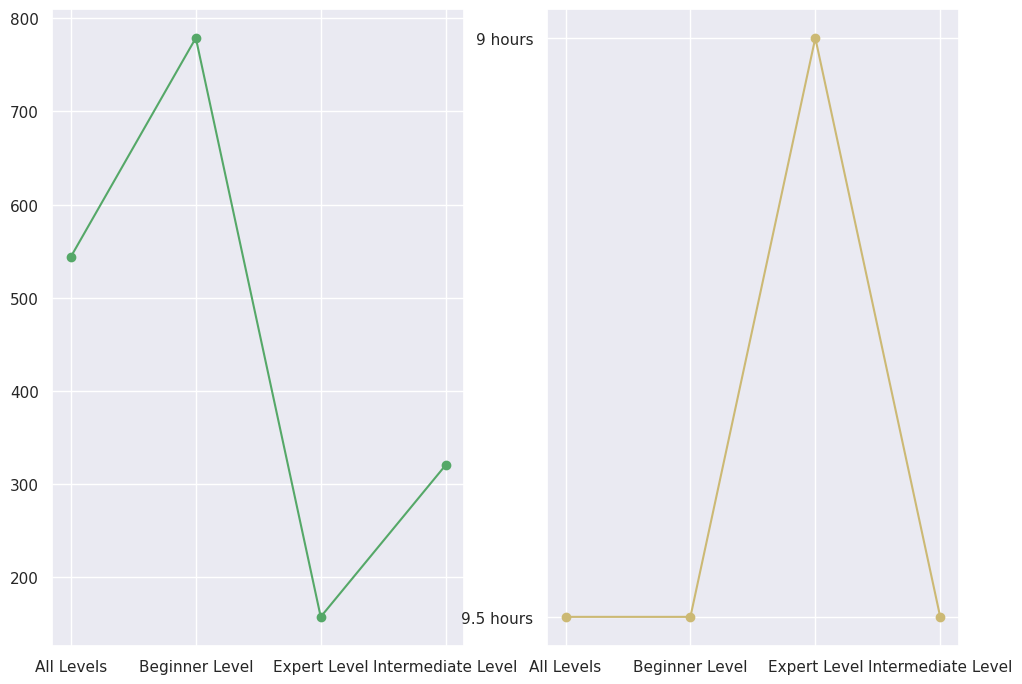

In [154]:
plt.subplot(1,2,1)
plt.plot(d_num.index,d_num['num_lectures'],'g',marker='o')

plt.subplot(1,2,2)
plt.plot(d_num.index,d_num['content_duration'],'y',marker='o')

plt.show()

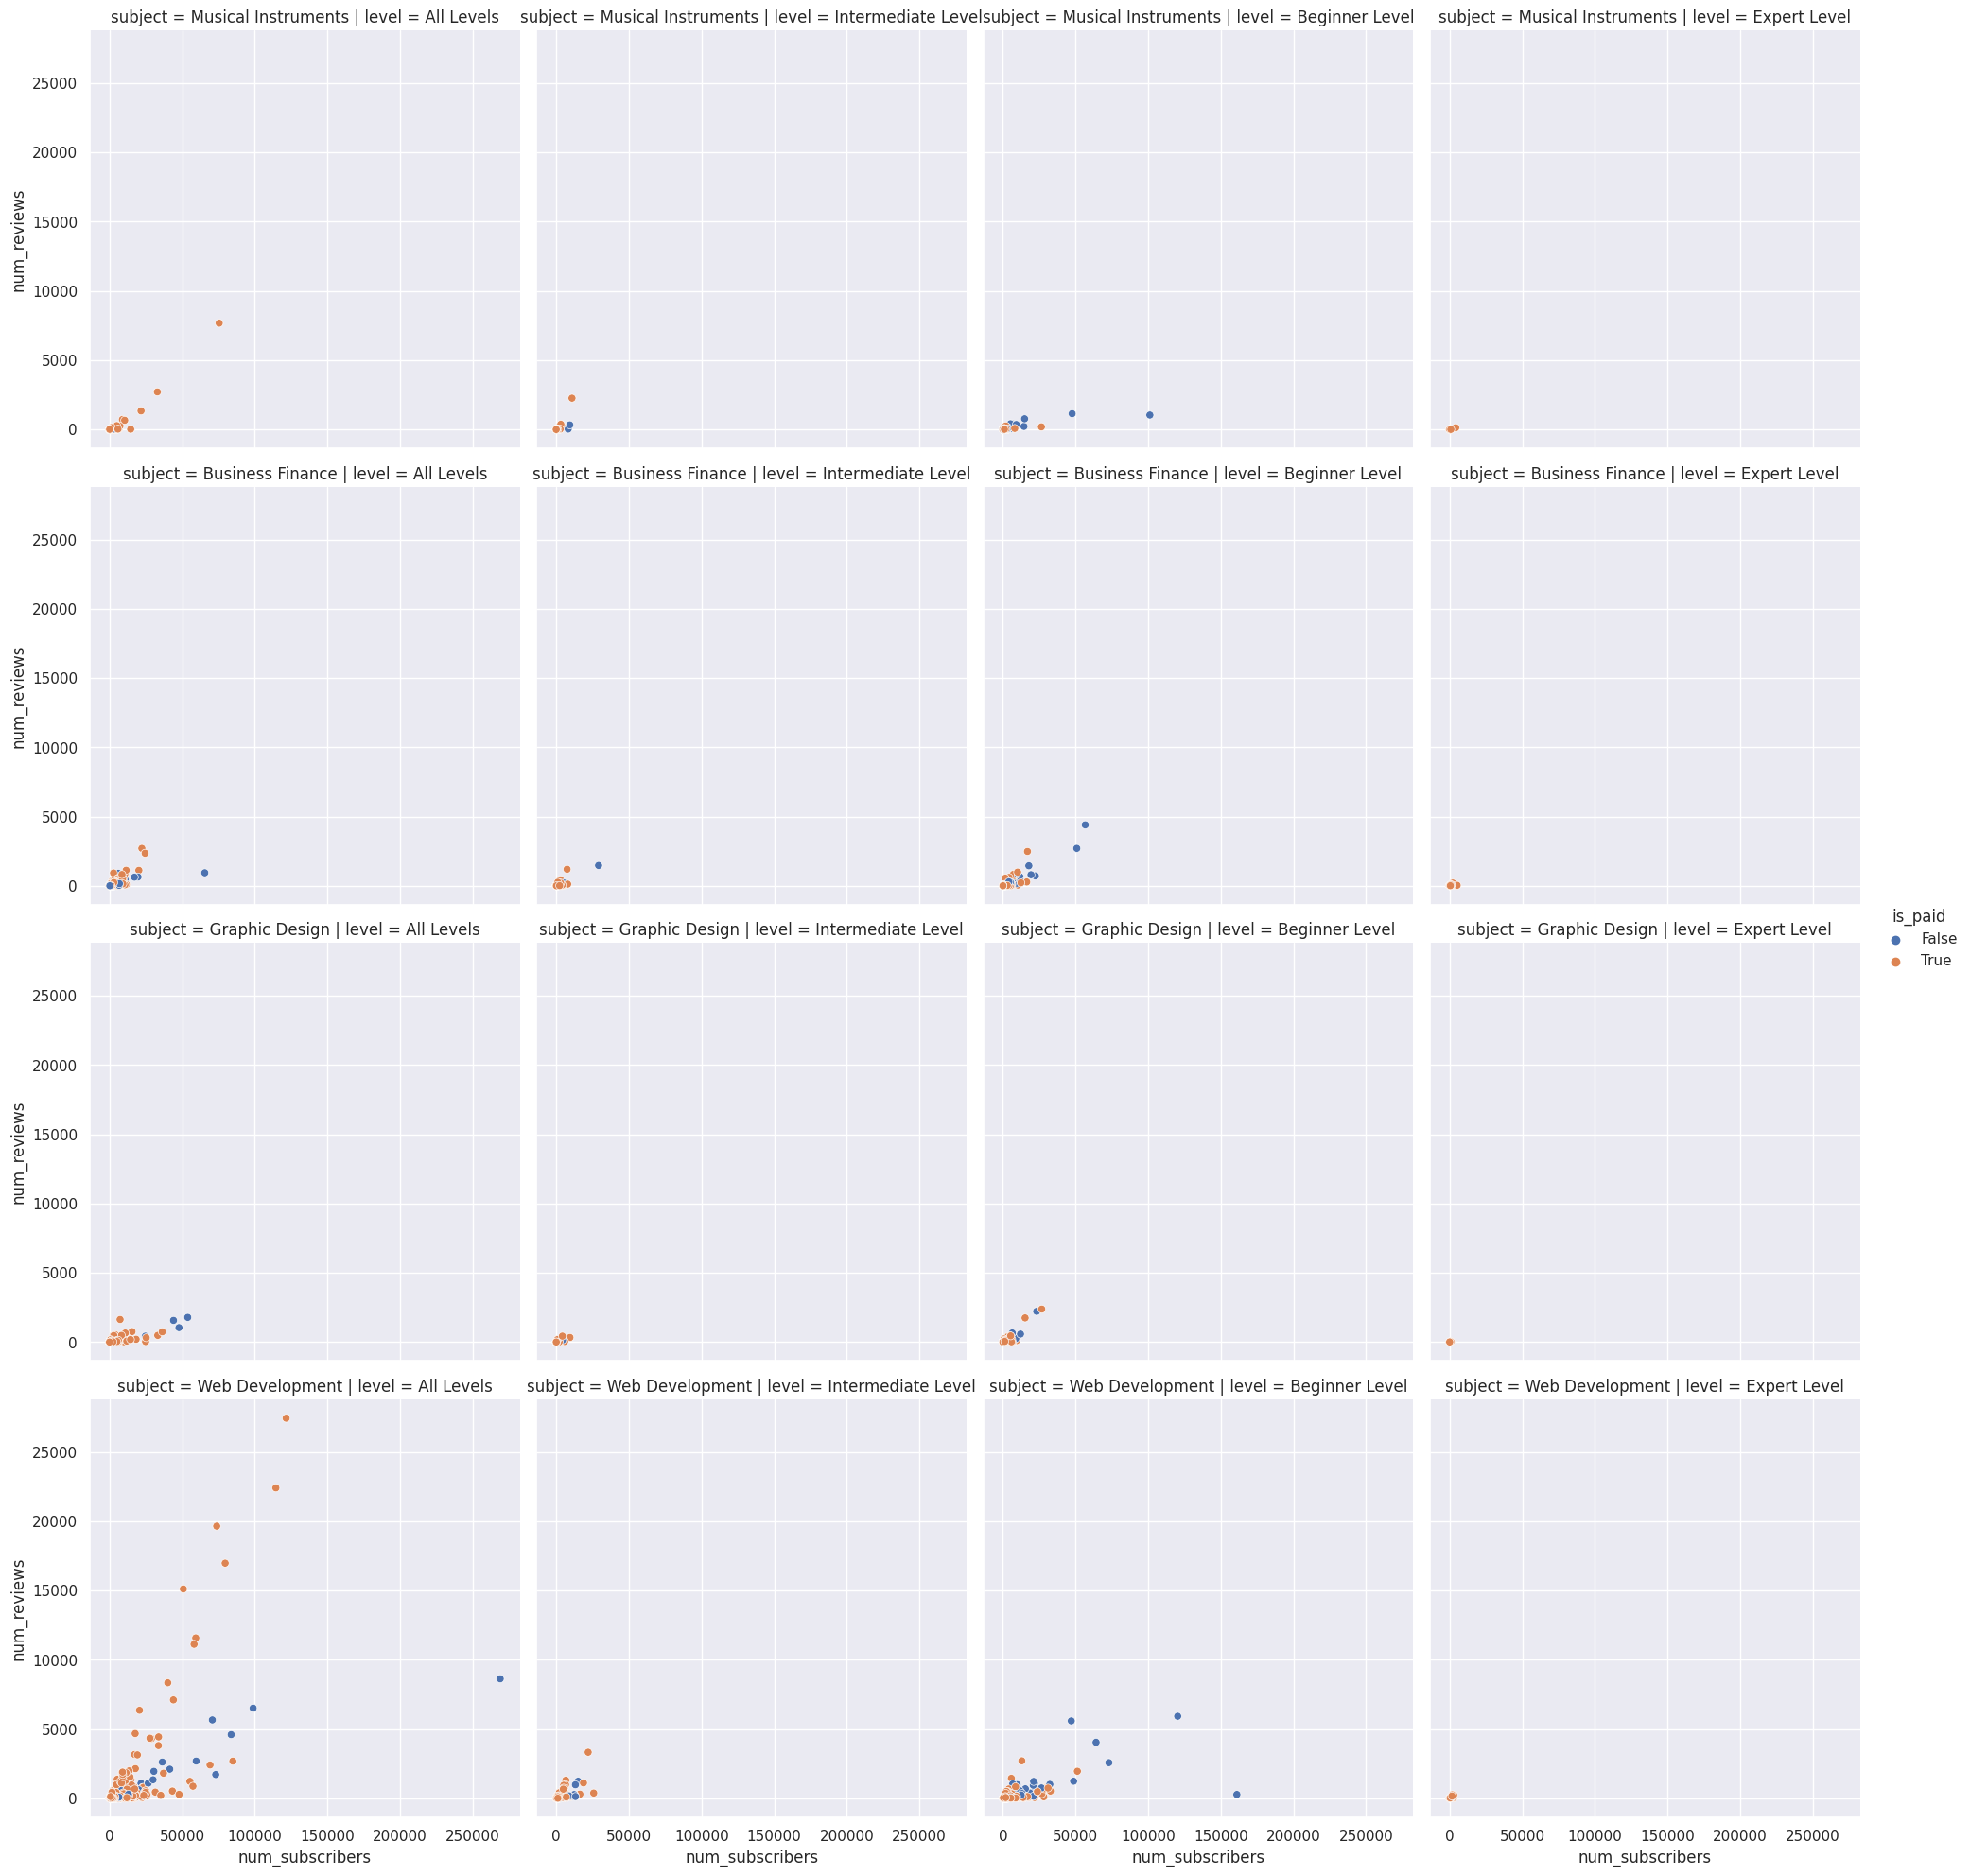

In [165]:
sns.relplot(data=udemy_data,y='num_reviews',x='num_subscribers',hue='is_paid',col='level',row='subject')

# **The last years of courses**

In [167]:
udemy_data['published_timestamp']=pd.to_datetime(udemy_data['published_timestamp'])
udemy_data['year']=udemy_data['published_timestamp'].dt.year

In [169]:
udemy_data.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,95,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,95,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,95,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017


In [170]:
udemy_data.year.value_counts()

year
2016    1206
2015    1014
2017     719
2014     491
2013     202
2012      45
2011       5
Name: count, dtype: int64

In [175]:
d_date=udemy_data.groupby('year')[["subject","level","is_paid","num_subscribers"]].max()
d_date

,subject,level,is_paid,num_subscribers
year,,,,
2011,Web Development,All Levels,True,69186
2012,Web Development,Intermediate Level,True,101154
2013,Web Development,Intermediate Level,True,268923
2014,Web Development,Intermediate Level,True,120291
2015,Web Development,Intermediate Level,True,121584
2016,Web Development,Intermediate Level,True,114512
2017,Web Development,Intermediate Level,True,26742


<Axes: xlabel='year', ylabel='count'>

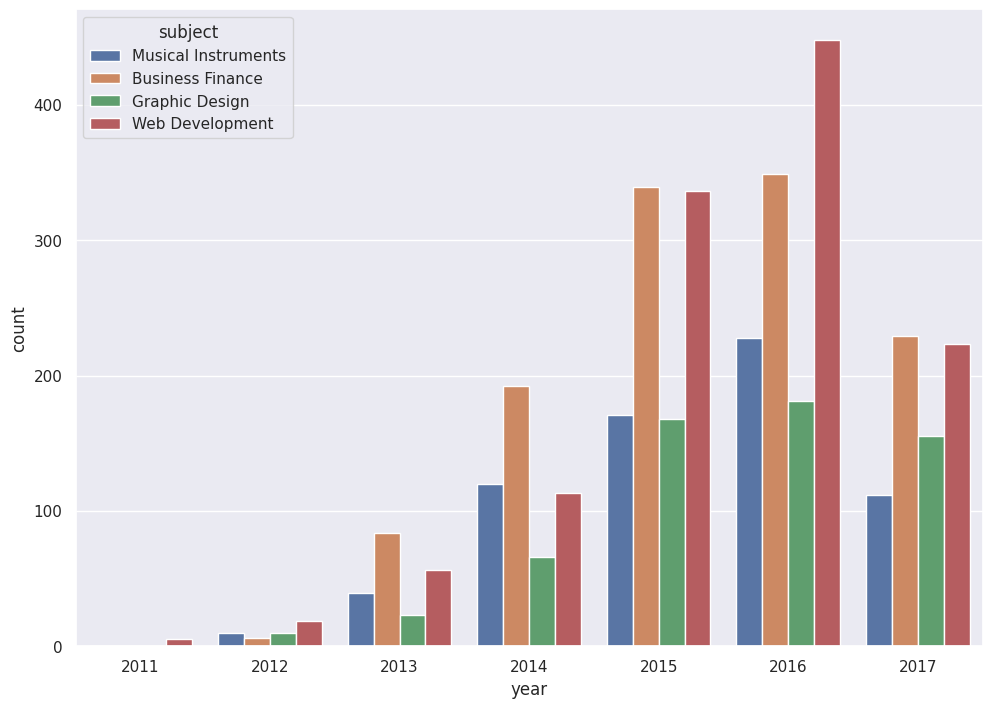

In [182]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='year',data=udemy_data,hue='subject')

<Axes: xlabel='year', ylabel='count'>

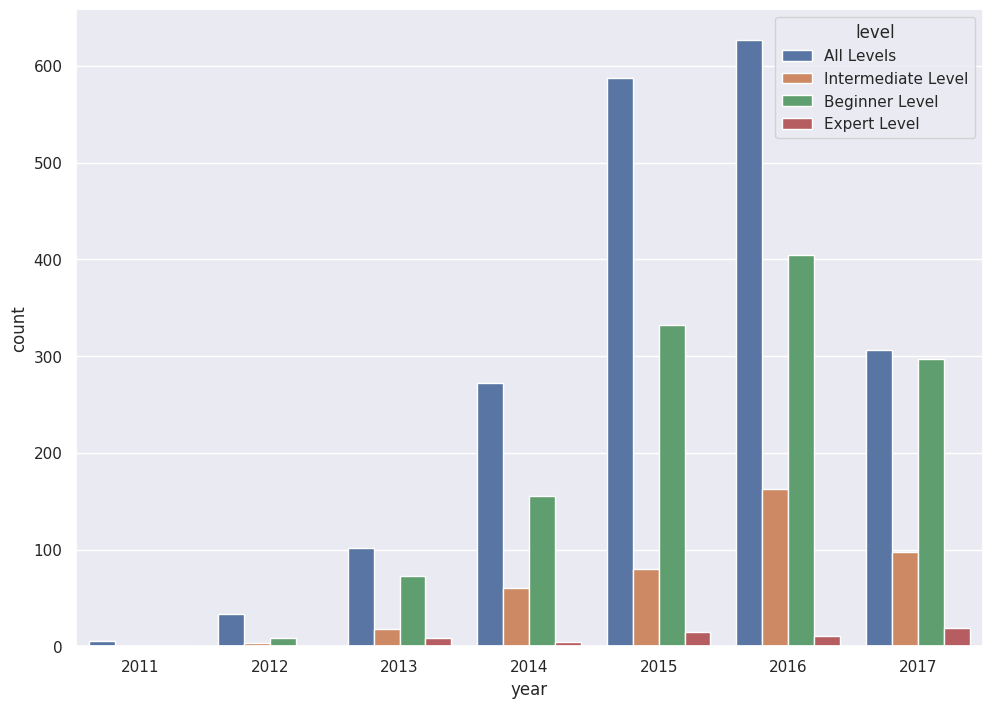

In [183]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='year',data=udemy_data,hue='level')

<Axes: xlabel='year', ylabel='count'>

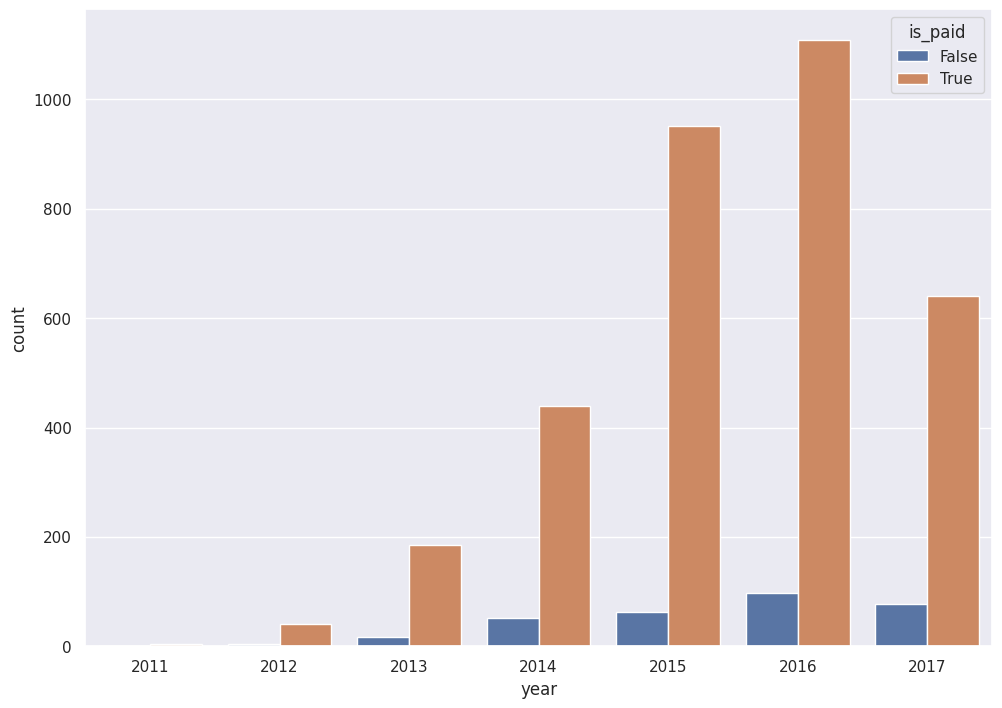

In [181]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='year',data=udemy_data,hue='is_paid')

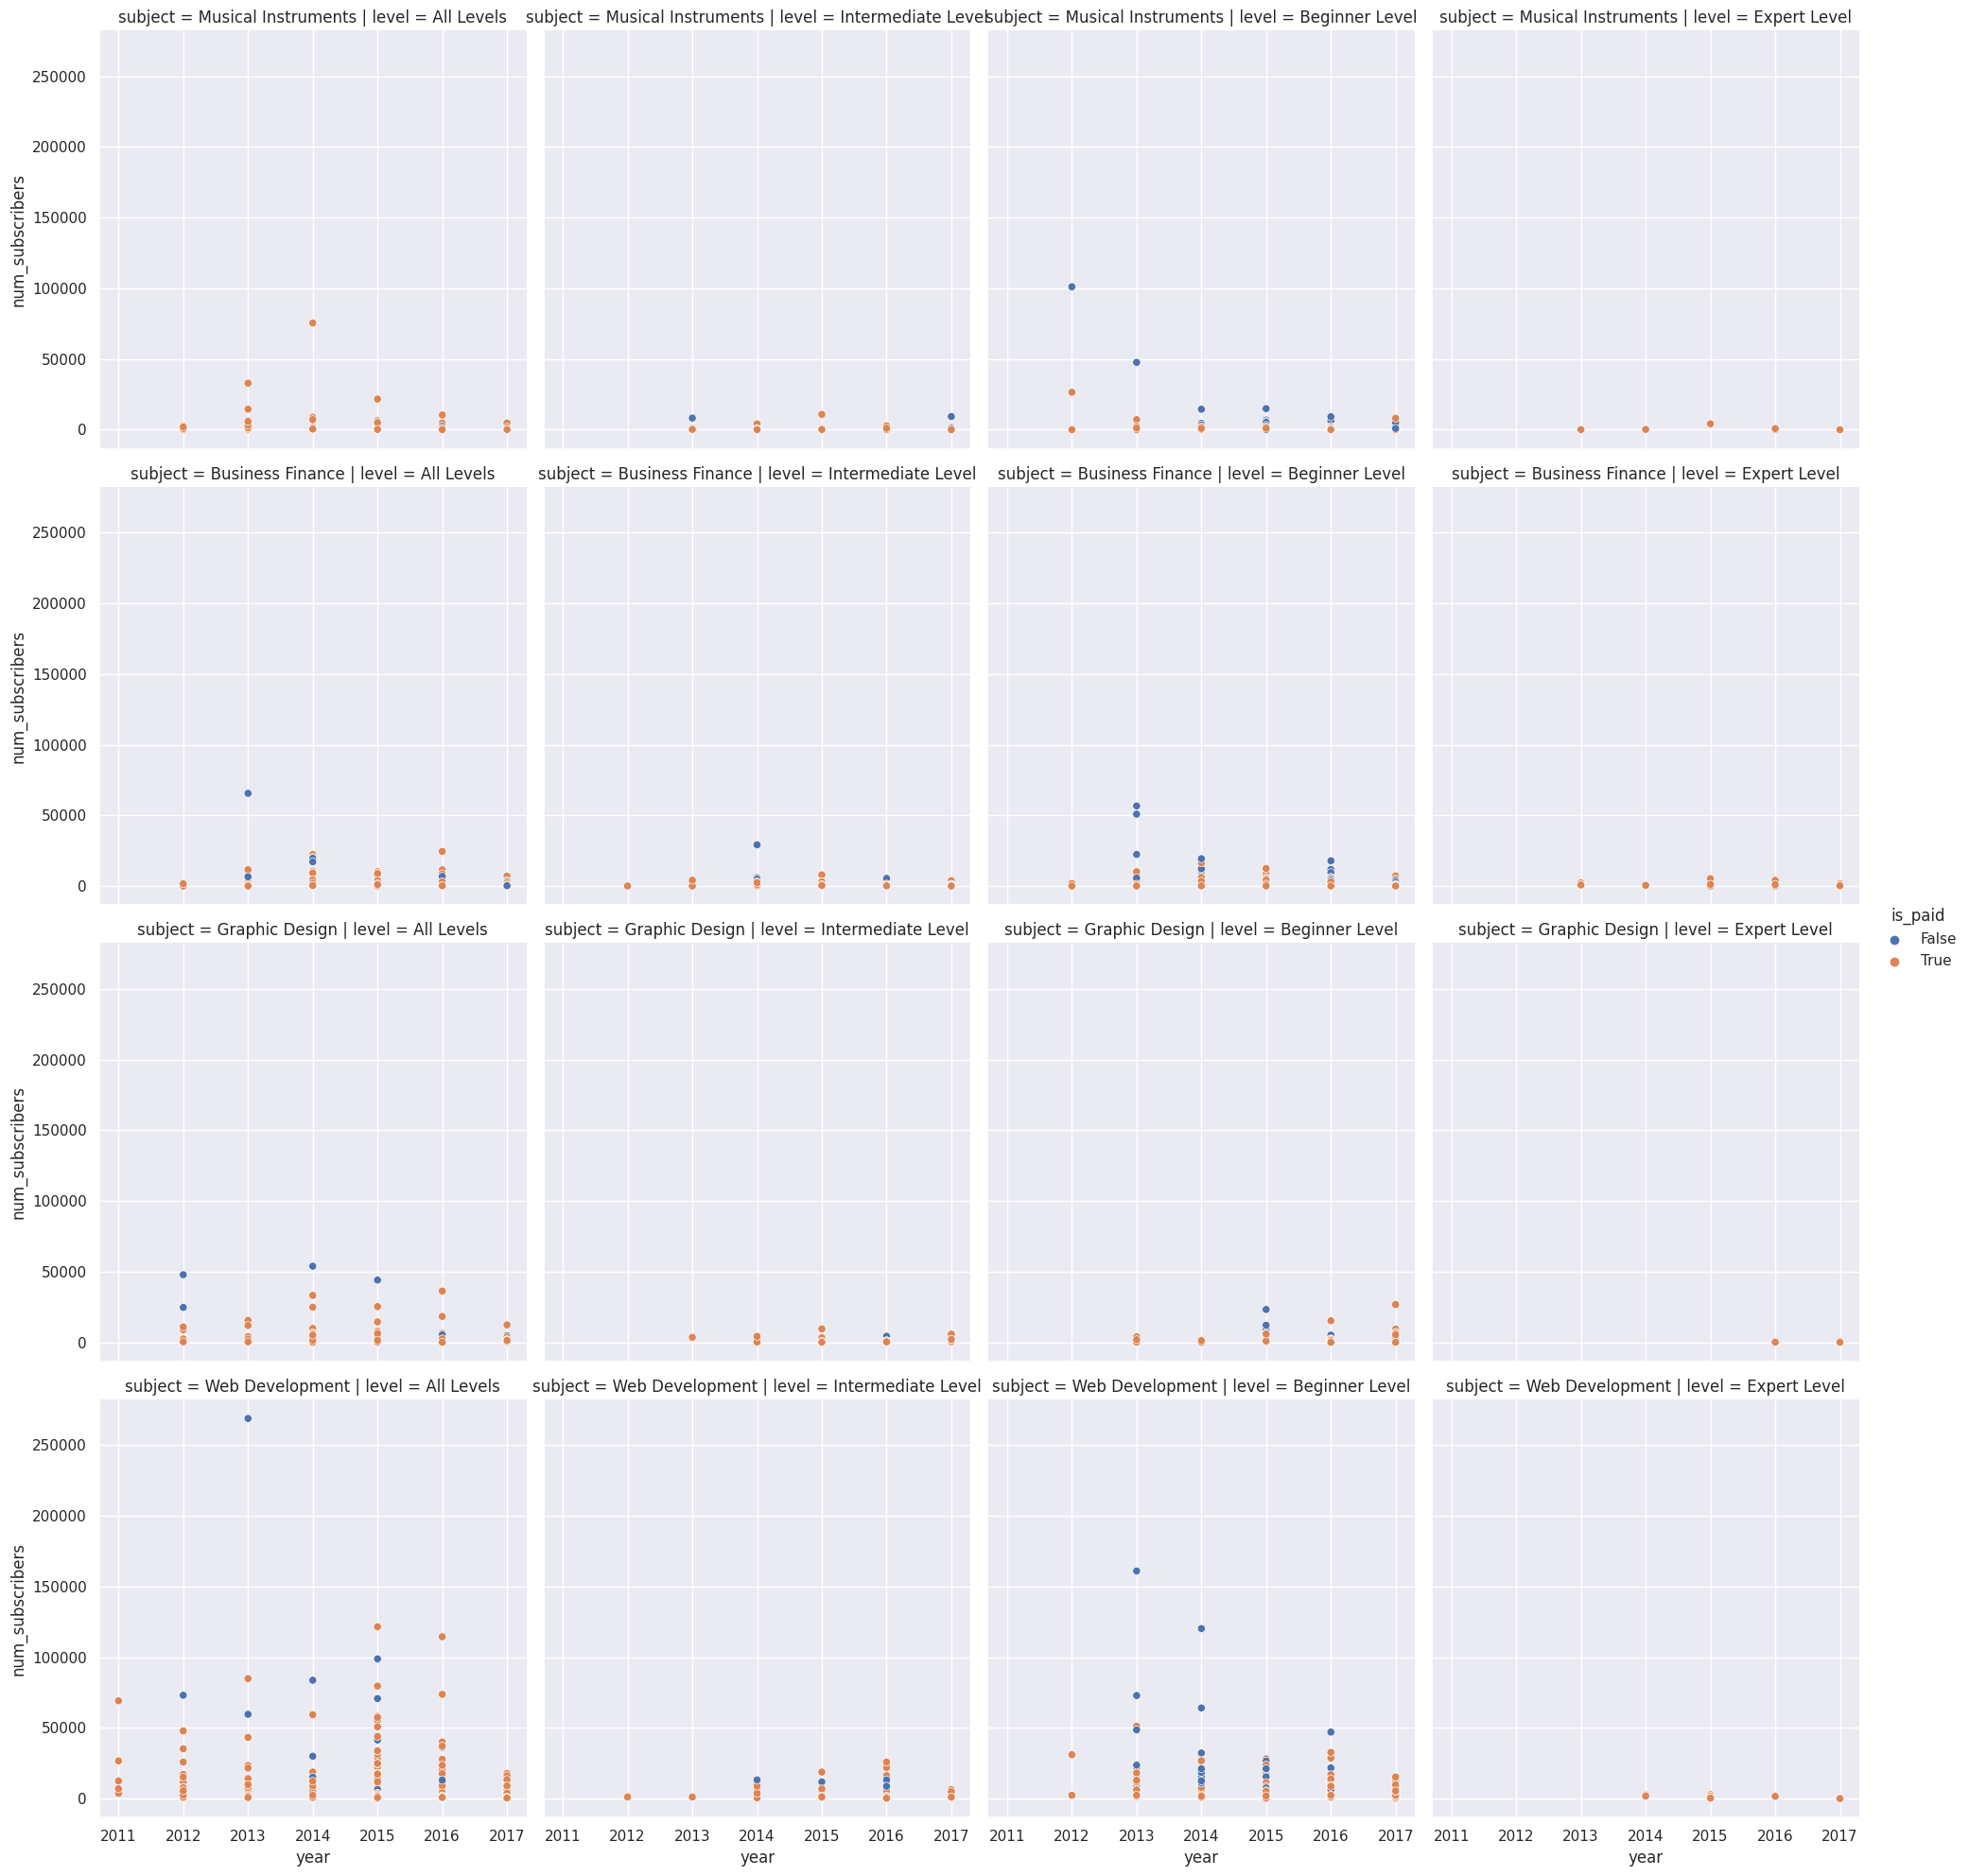

In [184]:
sns.relplot(data=udemy_data,y='num_subscribers',x='year',hue='is_paid',col='level',row='subject')

In [187]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   object             
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
 11  year                 3682 non-null   int32              
dtypes: bool(1), datetime

In [189]:
new_data=udemy_data.groupby("year")[["num_subscribers","num_reviews","num_lectures"]].sum().reset_index()
new_data.head()

,year,num_subscribers,num_reviews,num_lectures
0,2011,119028,4041,574
1,2012,555339,10272,2374
2,2013,1723438,48585,7261
3,2014,1930406,86667,19288
4,2015,3475324,196810,41930


In [190]:
h=new_data.corr()

<Axes: >

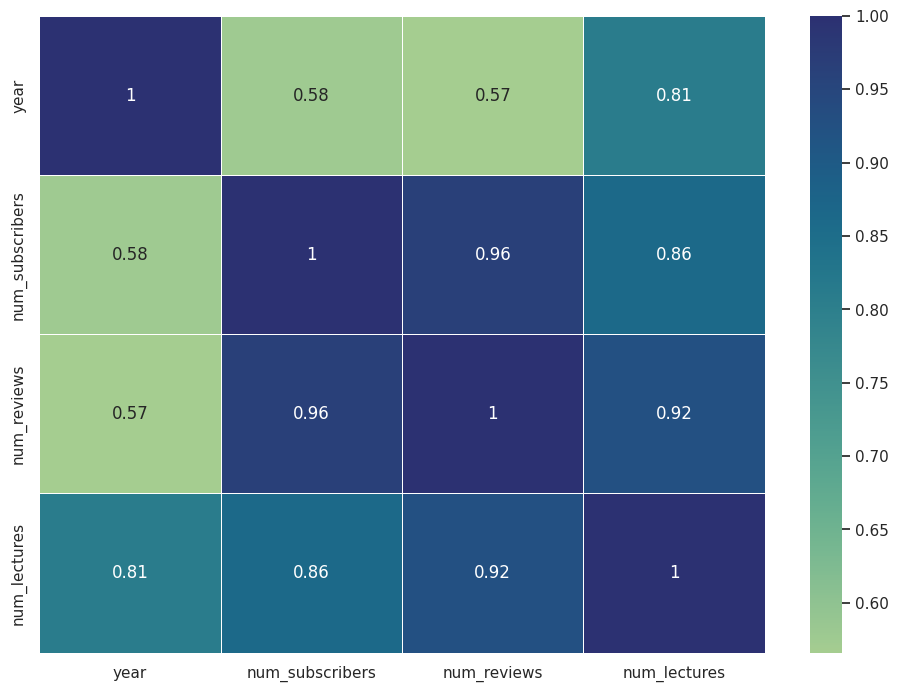

In [192]:
sns.heatmap(h, annot=True, linewidth=.5,cmap="crest")

# **Thank you**